In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:/Users/shash/Documents/csv datasets/Toyota (1).csv")
df

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


In [9]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


In [14]:
df.dtypes

Price           int64
Age           float64
KM           category
FuelType       object
HP             object
MetColor      float64
Automatic       int64
CC              int64
Doors          object
Weight          int64
dtype: object

In [25]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [20]:
median=df['Age'].median()
df['Age'].replace(np.nan,median,inplace=True)

In [22]:
mode=df['FuelType'].mode().values[0]
df['FuelType'].replace(np.nan,mode,inplace=True)

In [24]:
median=df['MetColor'].median()
df['MetColor'].replace(np.nan,median,inplace=True)

In [58]:
df.dtypes

Price          int64
Age          float64
KM             int32
FuelType      object
HP             int32
MetColor     float64
Automatic      int64
CC             int64
Doors          int32
Weight         int64
dtype: object

In [57]:
df['KM'].unique()
df['KM'].replace('??',10000,inplace=True)
df['KM']=df['KM'].astype('int')

In [28]:
df['FuelType'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [46]:
df['Doors'].unique()

array([3, '3', '5', '4', 4, 5, '2'], dtype=object)

In [41]:
df['Doors'].replace('three',3,inplace=True)

In [45]:
df['Doors'].replace('four',4,inplace=True)
df['Doors'].replace('five',5,inplace=True)

In [47]:
df['Doors']=df['Doors'].astype('int')

In [51]:
df['HP'].unique()

array(['90', 192, '192', '110', '97', '71', '116', '98', '69', '86', '72',
       '107', '73'], dtype=object)

In [52]:
df['HP'].replace('????',192,inplace=True)
df['HP']=df['HP'].astype('int')

In [59]:
#one hot encoding
one=pd.get_dummies(df,columns=['FuelType'])

In [61]:
df['FuelType']=df['FuelType'].astype('category')
df['new_FuelType']=df['FuelType'].cat.codes


In [65]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df[['FuelType']]).toarray())
enc_data

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1431,0.0,0.0,1.0
1432,0.0,0.0,1.0
1433,0.0,0.0,1.0
1434,0.0,0.0,1.0


In [71]:
data=df.join(enc_data)
data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,new_FuelType,0,1,2
0,13500,23.0,46986,Diesel,90,1.0,0,2000,3,1165,1,0.0,1.0,0.0
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165,1,0.0,1.0,0.0
2,13950,24.0,41711,Diesel,90,1.0,0,2000,3,1165,1,0.0,1.0,0.0
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165,1,0.0,1.0,0.0
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,60.0,20544,Petrol,86,1.0,0,1300,3,1025,2,0.0,0.0,1.0
1432,10845,72.0,10000,Petrol,86,0.0,0,1300,3,1015,2,0.0,0.0,1.0
1433,8500,60.0,17016,Petrol,86,0.0,0,1300,3,1015,2,0.0,0.0,1.0
1434,7250,70.0,10000,Petrol,86,1.0,0,1300,3,1015,2,0.0,0.0,1.0


In [72]:
data['new_FuelType'].unique()

array([1, 2, 0], dtype=int8)

In [73]:
data.drop(['FuelType'],axis=1,inplace=True)

In [75]:
data.dtypes

Price             int64
Age             float64
KM                int32
HP                int32
MetColor        float64
Automatic         int64
CC                int64
Doors             int32
Weight            int64
new_FuelType       int8
0               float64
1               float64
2               float64
dtype: object

# or remove the fueltype column

In [84]:
df


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,new_FuelType
0,13500,23.0,46986,90,1.0,0,2000,3,1165,1
1,13750,23.0,72937,90,1.0,0,2000,3,1165,1
2,13950,24.0,41711,90,1.0,0,2000,3,1165,1
3,14950,26.0,48000,90,0.0,0,2000,3,1165,1
4,13750,30.0,38500,90,0.0,0,2000,3,1170,1
...,...,...,...,...,...,...,...,...,...,...
1431,7500,60.0,20544,86,1.0,0,1300,3,1025,2
1432,10845,72.0,10000,86,0.0,0,1300,3,1015,2
1433,8500,60.0,17016,86,0.0,0,1300,3,1015,2
1434,7250,70.0,10000,86,1.0,0,1300,3,1015,2


<Axes: >

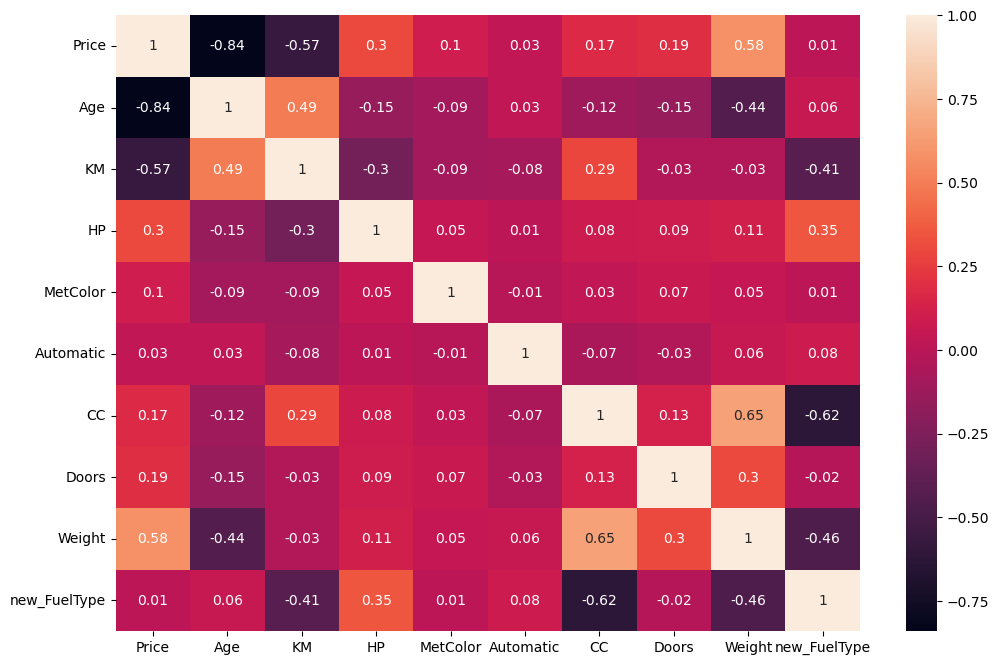

In [86]:
corr_m=df.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(corr_m,annot=True)

C:\Users\shash\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


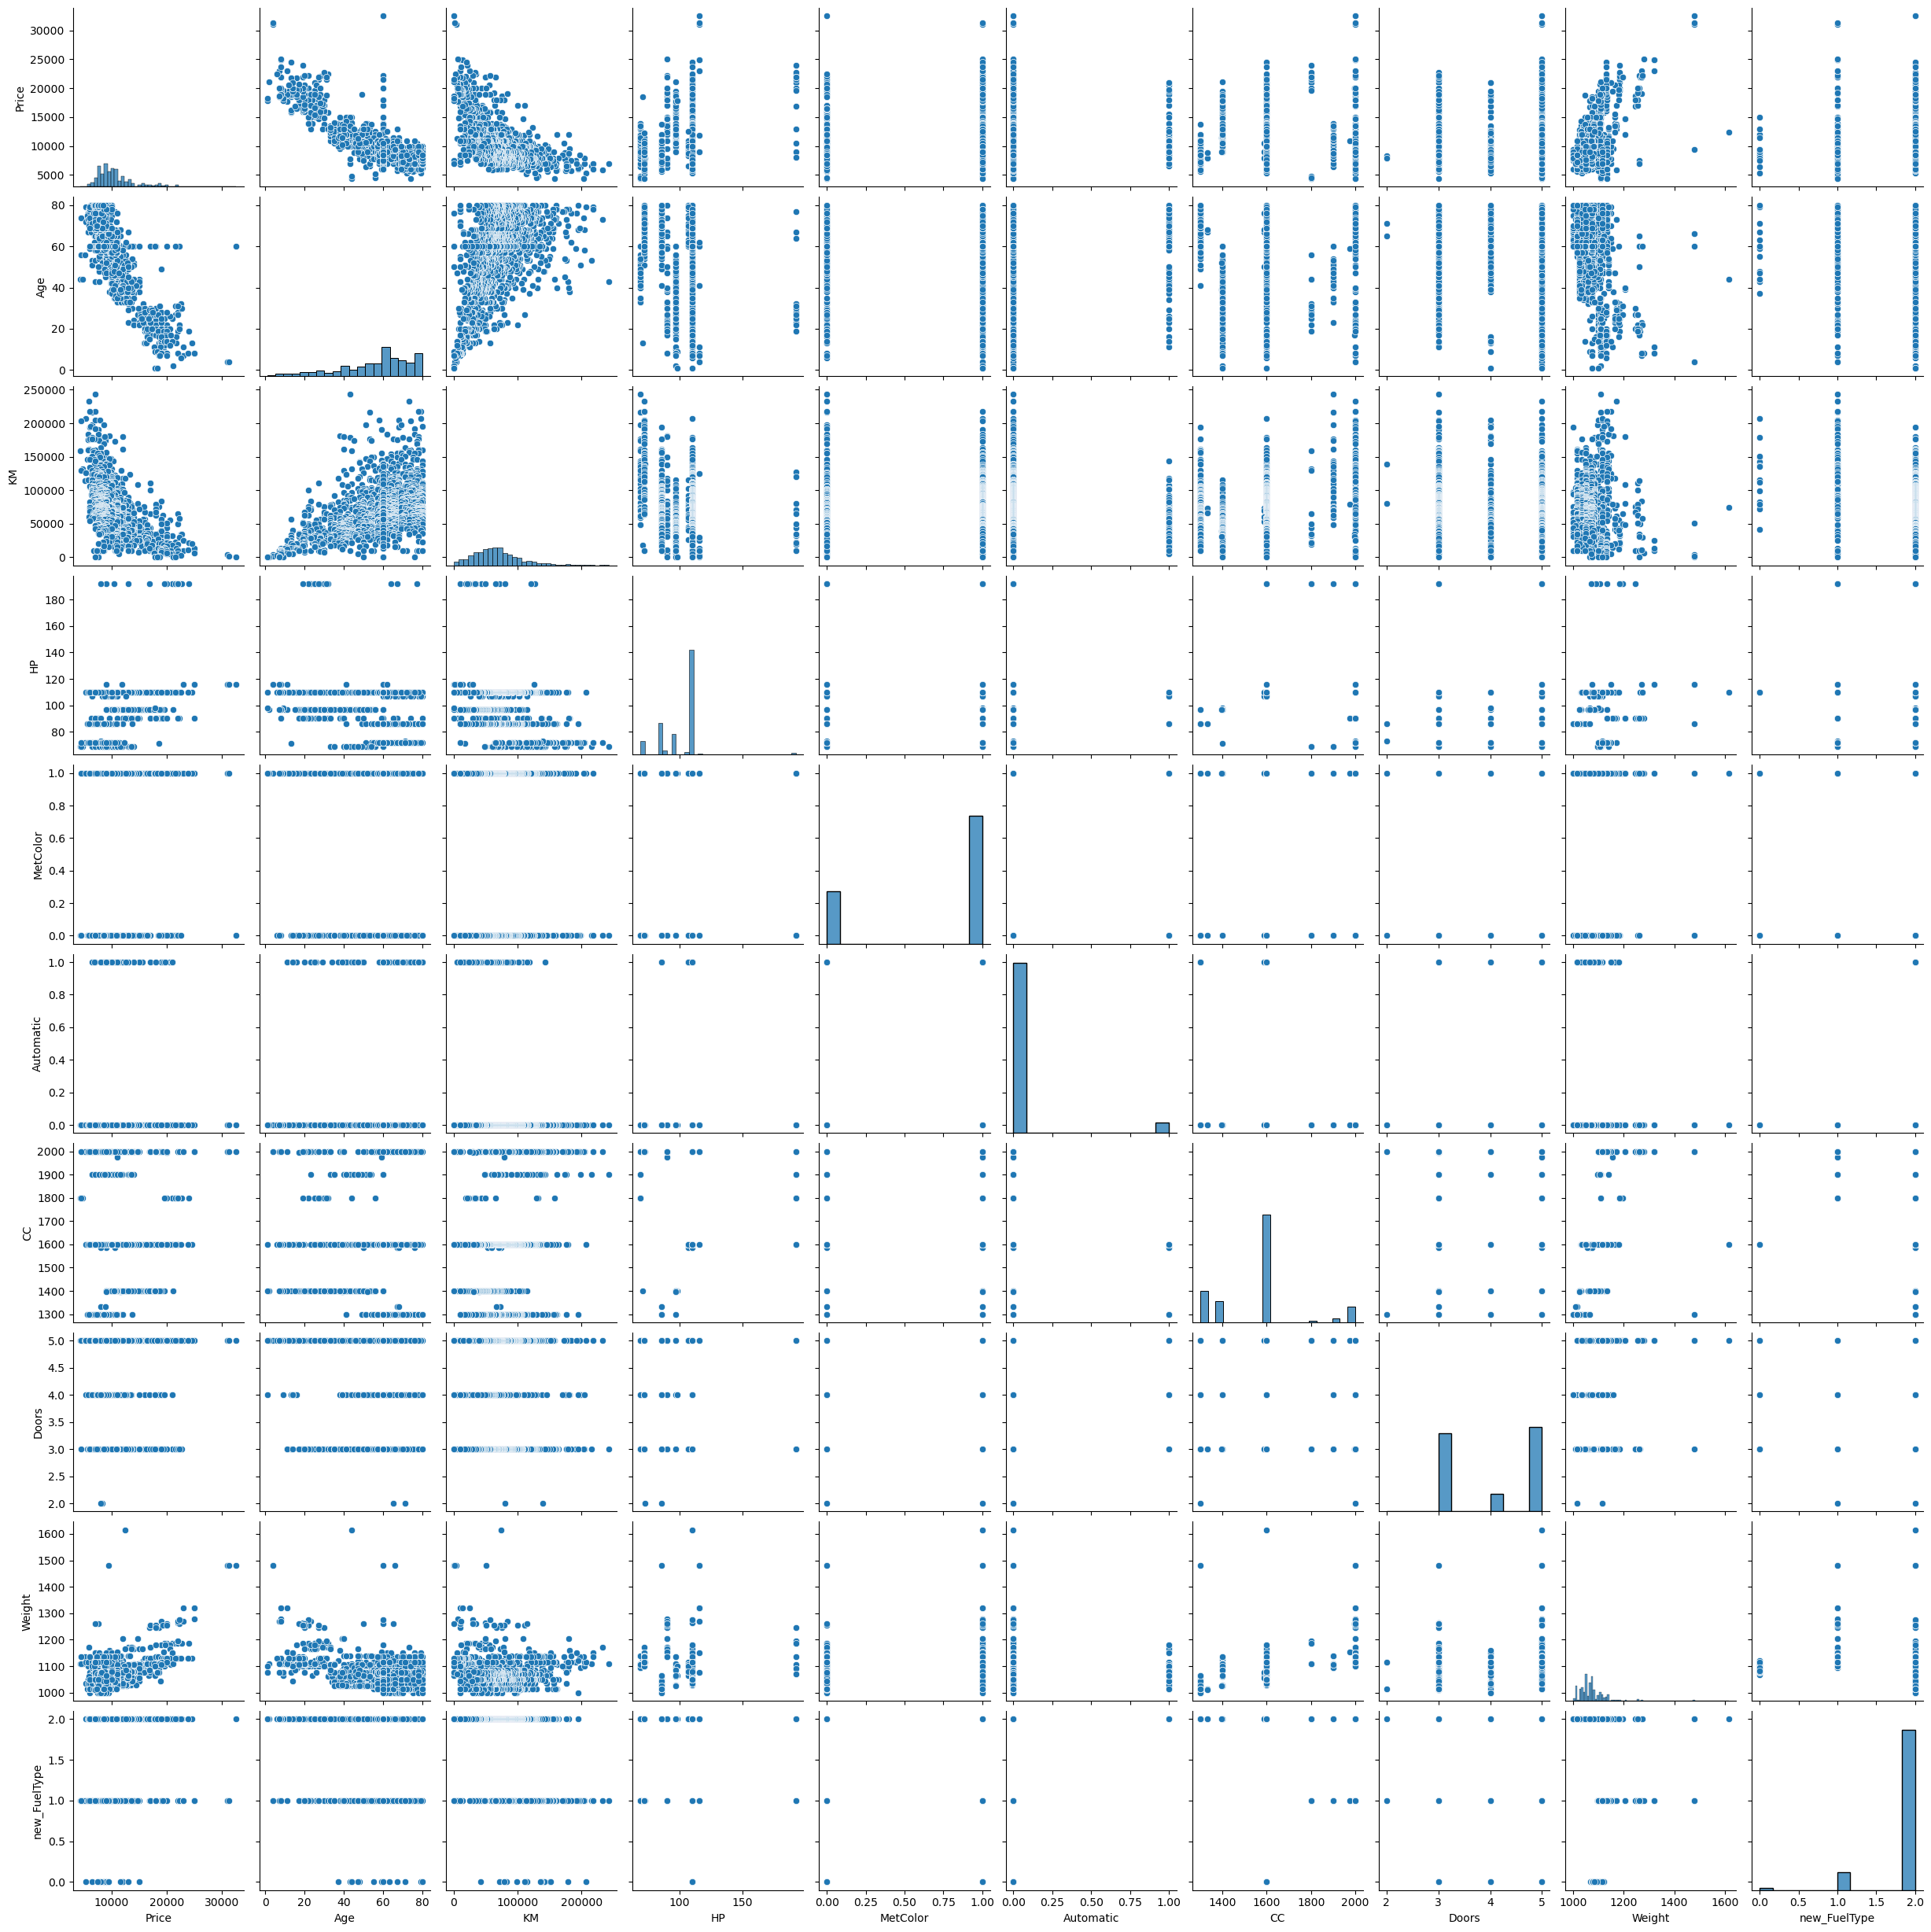

In [88]:
sns.pairplot(data=df)

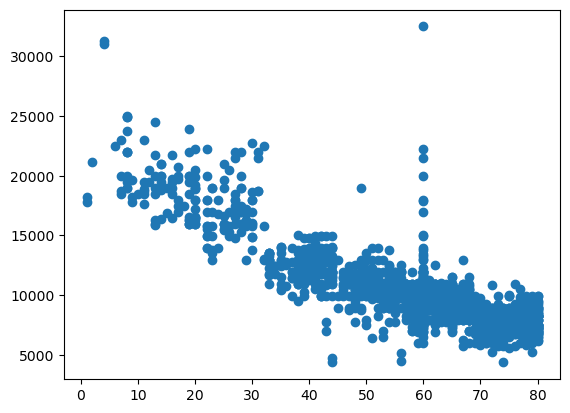

In [90]:
plt.scatter(data=df,x='Age',y='Price')
plt.show()

In [91]:
x=df[['Age']]
x.shape

(1436, 1)

In [93]:
y=df[['Price']]
y.shape

(1436, 1)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [101]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [102]:
y_pred=model.predict(x_train)

In [103]:
model.coef_

array([[-169.58899911]])

In [104]:
model.intercept_

array([20226.50127343])

In [106]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [110]:
print('mean_absolute_error:',mean_absolute_error(y_train,y_pred))
print('mean_squared_error:',mean_squared_error(y_train,y_pred))
print('mean_squared_root_error',np.sqrt(mean_squared_error(y_train,y_pred)))
print('r2_score',r2_score(y_train,y_pred))

mean_absolute_error: 1330.669121915978
mean_squared_error: 3839048.531856311
mean_squared_root_error 1959.349007159345
r2_score 0.7026005983312346


<Axes: xlabel='Price'>

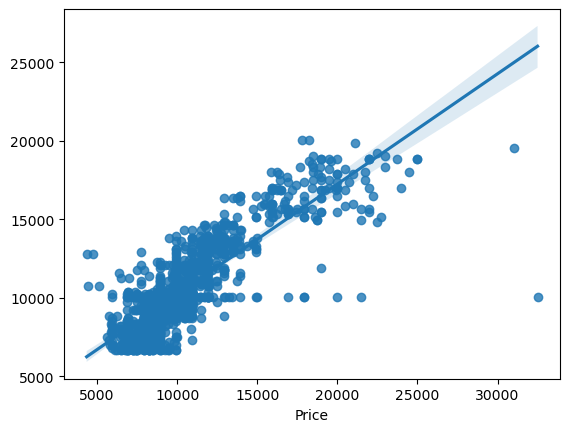

In [111]:
sns.regplot(data=df,x=y_train,y=y_pred)

In [112]:
y_test_pred=model.predict(x_test)

In [113]:
print('mean_absolute_error:',mean_absolute_error(y_test,y_test_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_test_pred))
print('mean_squared_root_error',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('r2_score',r2_score(y_test,y_test_pred))

mean_absolute_error: 1263.0683232500814
mean_squared_error: 3472558.207029291
mean_squared_root_error 1863.4801332531804
r2_score 0.7534865181291123


<Axes: xlabel='Price'>

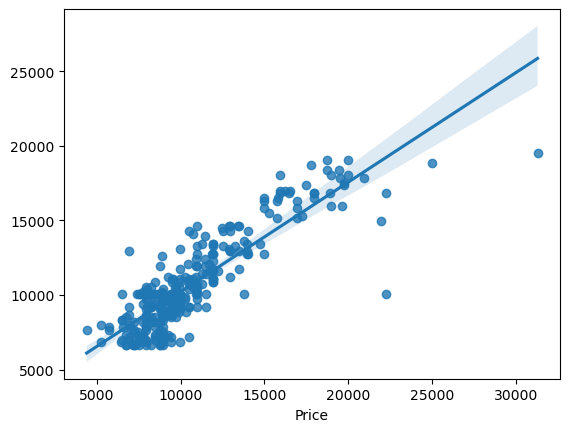

In [114]:
sns.regplot(data=df,x=y_test,y=y_test_pred)

In [ ]:
s